In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Лабораторная работа №1
## Задание 1
### {Фамилия Имя}, {Номер группы}, Вариант {Номер варианта}, ({Дата})

### Задание

По данным выборки требуется:
- В случае дискретного признака:
	1. Составить статистическое распределение выборки, предварительно записав дискретный вариационный ряд.
	2. Составить ряд распределения относительных частот.
	3. Построить полигон частот.
	4. Составить эмпирическую функцию распределения.
	5. Построить график эмпирической функции распределения.
- В случае непрерывного признака:
	1. Составить статистическое распределение выборки, предварительно записав дискретный вариационный ряд.
	1. Составить интервальный ряд распределения относительных частот.
	1. Построить гистограмму относительных частот.
	1. Составить эмпирическую функцию распределения.
	1. Построить график эмпирической функции распределения.

### Данные

In [2]:
lb_author = 'Кондрашин Тимофей'
lb_num = 1
lb_excercise_num = 1
lb_variant = 1
print(f'Фамилия Имя: {lb_author}\nНомер лабораторной работы: {lb_num}\nНомер задания лабораторной работы: {lb_excercise_num}\nВариант лабораторной работы: {lb_variant}')

Фамилия Имя: Кондрашин Тимофей
Номер лабораторной работы: 1
Номер задания лабораторной работы: 1
Вариант лабораторной работы: 1


In [3]:
task = pd.read_json('input/Данные к заданию №1.json')
task['Описание к данным'][lb_variant - 1]

'Данные о получении прибыли рядом акционерных обществ района за год (млн руб.)'

In [6]:
data = pd.DataFrame(task['Данные'][lb_variant - 1])
data_len = len(data)
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,320,288,306,300,250,260,270,250,300,305,320,250,300,270,255


## Пункт 1
**Составить статистическое распределение выборки, предварительно записав дискретный вариационный ряд.**

### Вариационный ряд

In [10]:
data_sort = data.sort_values(by=[0])
data_sort = data_sort[0].tolist()
data_sort

[250, 250, 250, 255, 260, 270, 270, 288, 300, 300, 300, 305, 306, 320, 320]

## Пункт 2
**Составить ряд распределения относительных частот.**

### Варианты, $x_i$

In [11]:
unique = data[0].unique().tolist()
unique.sort()
unique

[250, 255, 260, 270, 288, 300, 305, 306, 320]

### Частота, $n_i$

In [56]:
freq = pd.Series(data_sort).value_counts().sort_index()
freq = pd.DataFrame(freq, index=unique, columns=["Частота"]).T
freq

,250,255,260,270,288,300,305,306,320
Частота,3,1,1,2,1,3,1,1,2


### Относительная частота, $w_i$

In [31]:
rel_freq = []
for x in unique:
    rel_freq.append(data_sort.count(x) / data_len)
rel_freq = pd.DataFrame(rel_freq)
rel_freq.index = unique
rel_freq.columns = ["Относительная частота"]
rel_freq = rel_freq.T
rel_freq = rel_freq.rename(columns={0: '3', 1: '4', 2: '5', 3: '6', 4: '7', 5: '8', 6: '9'})
rel_freq

,250,255,260,270,288,300,305,306,320
Относительная частота,0.2,0.066667,0.066667,0.133333,0.066667,0.2,0.066667,0.066667,0.133333


## Пункт 3
**Построить полигон частот.**

### Полигон частот вариационного ряда

In [35]:
fig = px.line(x=unique, y=freq.iloc[0], markers=True, title='Полигон частот вариационного ряда')
fig.show()

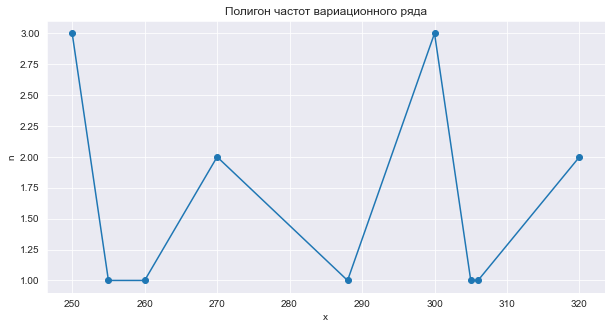

In [21]:
def plot_freq_polygon(x, y, title):
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.plot(x, y, marker='o')
    ax.set_xlabel("x")
    ax.set_ylabel("n")
    plt.plot()

plot_freq_polygon(x=unique, y=freq.iloc[0], title='Полигон частот вариационного ряда')

### Полигон относительных частот вариационного ряда

In [36]:
fig = px.line(x=unique, y=rel_freq.iloc[0], markers=True, title='Полигон относительных частот вариационного ряда')
fig.show()

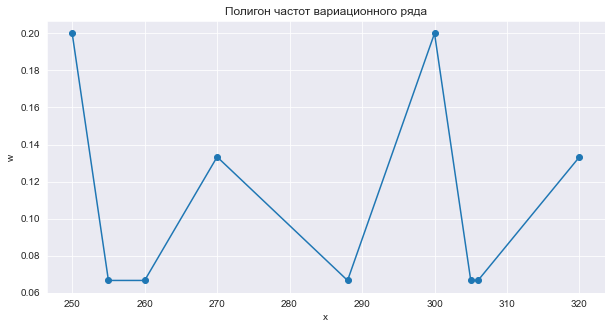

In [25]:
def plot_rel_freq_polygon(x, y, title):
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.plot(x, y, marker='o')
    ax.set_xlabel("x")
    ax.set_ylabel("w")
    plt.plot()

plot_rel_freq_polygon(x=unique, y=rel_freq.iloc[0], title='Полигон частот вариационного ряда')

## Пункт 4
**Составить эмпирическую функцию распределения.**

### Эмпирическая функция распределения $F^*$

In [37]:
emp_func = []
for i, x in enumerate(unique):
    emp_func.append(sum(rel_freq.values.tolist()[0][:i]))
emp_func = pd.DataFrame(emp_func)
emp_func.index = unique
emp_func.columns = ["F*"]
emp_func = emp_func.T
emp_func

,250,255,260,270,288,300,305,306,320
F*,0.0,0.2,0.266667,0.333333,0.466667,0.533333,0.733333,0.8,0.866667


## Пункт 5
**Построить график эмпирической функции распределения.**

### График эмпирической функции распределения

In [38]:
fig = px.ecdf(
    x=unique,
    y=emp_func.values.tolist()[0],
    markers=True,
    title='График эмпирической функции распределения'
    )
fig.show()

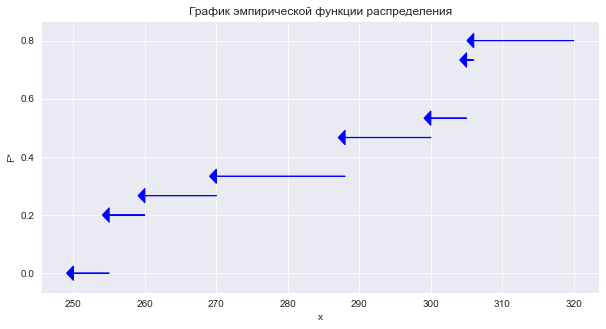

In [57]:
def plot_cdf_func(x, y, title, c):
    fig, ax = plt.subplots(figsize=(10, 5))
    min_y, max_y = min(y), max(y)
    arrow_length = ((max_y - min_y) / len(y)) * c
    for idx in range(len(y) - 1):
        dx = x[idx] - x[idx + 1]
        ax.arrow(x=x[idx + 1], y=y[idx], dx=dx, dy=0, color="blue", head_width=.05, head_length=arrow_length)
    ax.set_title(title)
    ax.set_ylabel("F*")
    ax.set_xlabel("x")
    plt.plot()

plot_cdf_func(unique, emp_func.iloc[0].tolist(), 'График эмпирической функции распределения', 10)

In [39]:
answer = pd.DataFrame()
answer['Фамилия Имя'] = [lb_author]
answer['Номер лабораторной работы'] = [lb_num]
answer['Номер задания лабораторной работы'] = [lb_excercise_num]
answer['Вариант лабораторной работы'] = [lb_variant]
answer['Вариационный ряд'] = [str(data_sort)]
answer['Варианты'] = [str(unique)]
answer['Частота'] = [str(freq.iloc[0].tolist())]
answer['Относительная частота'] = [str(rel_freq.iloc[0].tolist())]
answer['Эмпирическая функция распределения'] = [str(emp_func.iloc[0].tolist())]
answer.to_csv('output/Кондрашин_ЛБ1_Задание_1.csv', index=False)
answer

,Фамилия Имя,Номер лабораторной работы,Номер задания лабораторной работы,Вариант лабораторной работы,Вариационный ряд,Варианты,Частота,Относительная частота,Эмпирическая функция распределения
0,Кондрашин Тимофей,1,1,1,"[250, 250, 250, 255, 260, 270, 270, 288, 300, ...","[250, 255, 260, 270, 288, 300, 305, 306, 320]","[3, 1, 1, 2, 1, 3, 1, 1, 2]","[0.2, 0.06666666666666667, 0.06666666666666667...","[0.0, 0.2, 0.26666666666666666, 0.333333333333..."
